In [1]:
%matplotlib nbagg
%load_ext autoreload
%autoreload 2

from ProbabilisticDynamicsModel import *
from utils import *
import gym

/usr/local/lib/python3.5/site-packages/theano/tensor/signal/downsample.py:6: UserWarning: downsample module has been moved to the theano.tensor.signal.pool module.
  "downsample module has been moved to the theano.tensor.signal.pool module.")


In [2]:
env = gym.make('MountainCarContinuous-v0')

[2017-07-25 15:57:24,065] Making new env: MountainCarContinuous-v0


# Training the PDM
We randomly sample the state space of the problem for training data. However, rather than sampling the entire state space, we limit the sampling to within $x$ from $[-0.5, -0.5]$ to $[0.0,0.5]$, and $u$ from $[-0.2]$ to $[0.2]$

In [3]:
transitions = sample_transitions(env, [-0.6,-0.07], [-0.2,0.07], [-0.5], [0.5], 5000)

In [4]:
x_dim = transitions["x"].shape[1]
u_dim = transitions["u"].shape[1]

In [5]:
run_config = tf.ConfigProto()
run_config.gpu_options.allow_growth = True
sess = tf.Session(config = run_config)

pdm = MLPDynamicsModel(sess, x_dim, u_dim,
                       hidden_layer_sizes=[16,32,16],
                       dropout_prob=0.2,
                       num_mc_samples=100,
                       filename='test_0.2drop_lldiff_60e_5000_50_lr2',
                       writer_path='ipython_runs')
pdm.build_model()

layer 0, shape [None, 100, 16]
layer 1, shape [None, 100, 32]
layer 2, shape [None, 100, 16]


In [6]:
cfg = MLP_DM_cfg
cfg["lr"] = 2e-2
cfg["batch_size"] = 50
cfg["n_epochs"] = 20
cfg["store_val"] = False
with sess.as_default():
    pdm.train(transitions, cfg)

Training with 3500 input/target pairs.
Epoch: [ 0] [   0/  70] time: 0.1473, train_loss: -3.76255989, val_loss: 0.00000000
Epoch: [ 0] [  10/  70] time: 0.2807, train_loss: -6.36077023, val_loss: 0.00000000
Epoch: [ 0] [  20/  70] time: 0.4058, train_loss: -7.53781986, val_loss: 0.00000000
Epoch: [ 0] [  30/  70] time: 0.5340, train_loss: -9.32011604, val_loss: 0.00000000
Epoch: [ 0] [  40/  70] time: 0.6631, train_loss: -9.65834236, val_loss: 0.00000000
Epoch: [ 0] [  50/  70] time: 0.7952, train_loss: -10.02093792, val_loss: 0.00000000
Epoch: [ 0] [  60/  70] time: 0.9233, train_loss: -10.31213856, val_loss: 0.00000000
Epoch: [ 1] [   0/  70] time: 1.0537, train_loss: -10.52857304, val_loss: 0.00000000
Epoch: [ 1] [  10/  70] time: 1.1822, train_loss: -10.85367012, val_loss: 0.00000000
Epoch: [ 1] [  20/  70] time: 1.3178, train_loss: -11.13030624, val_loss: 0.00000000
Epoch: [ 1] [  30/  70] time: 1.4465, train_loss: -11.39963722, val_loss: 0.00000000
Epoch: [ 1] [  40/  70] time: 1

# Testing the Learned Model
We test the model on a slice of the state space, namely with $x_1$ fixed to a value, and with $u=0.2$, over $x_0$ from -1 to 1. 

<IPython.core.display.Javascript object>


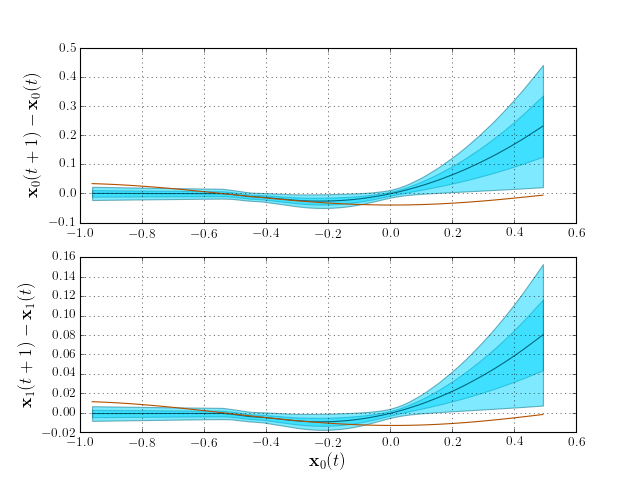

In [7]:
x_range = np.array([[-1, 0.0],[0.5, 0.0]])
u_range = np.array([[-0.1], [-0.1]])
sample_and_plot_results(env, pdm, x_range, u_range)

<IPython.core.display.Javascript object>


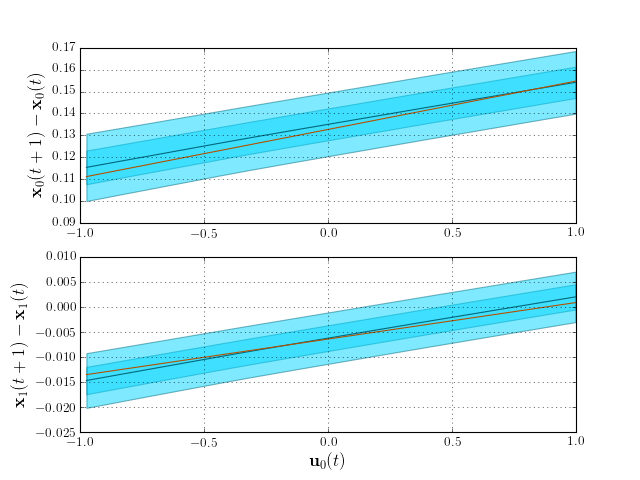

In [8]:
x_range = np.array([[-0.4, 0.03],[-0.4, 0.03]])
u_range = np.array([[-1], [1]])
sample_and_plot_results(env, pdm, x_range, u_range)

<IPython.core.display.Javascript object>


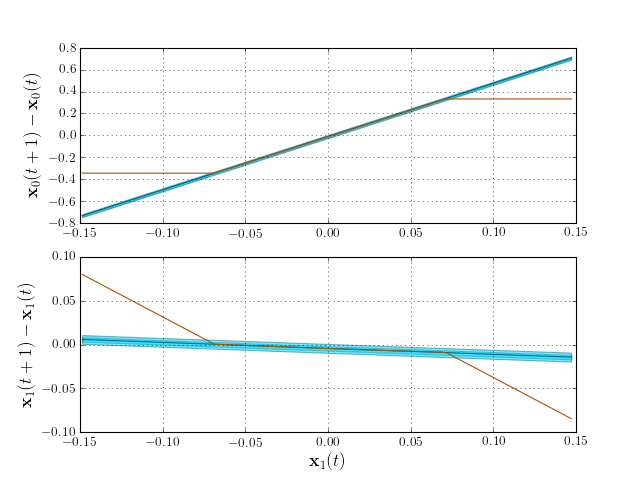

In [9]:
x_range = np.array([[-0.4, -0.15],[-0.4, 0.15]])
u_range = np.array([[-0.0], [-0.0]])
sample_and_plot_results(env, pdm, x_range, u_range)